In [1]:
#import libraries
import pandas as pd
import settings

Link = settings.ASSEMBLED_DIR 

#Master Dataset
Master_df = pd.read_csv(Link + "\\Master_dataset.csv")


In [2]:
Master_df.head(5)

,DAY,DATE_x,MONTH,YEAR,STATE,DEMAND,MAX_TEMP,MIN_TEMP,Holiday_Flag,Weekened_Flag
0,1,2014-01-01,1,2014,NSW,314475.77,28.10000,19.600000,0.0,0
1,1,2014-01-01,1,2014,QLD,261141.39,31.30000,20.300000,0.0,0
2,1,2014-01-01,1,2014,SA,67966.79,28.59868,16.589549,0.0,0
3,1,2014-01-01,1,2014,TAS,43074.70,15.70000,4.400000,0.0,0
4,1,2014-01-01,1,2014,VIC,196809.16,26.50000,15.500000,0.0,0


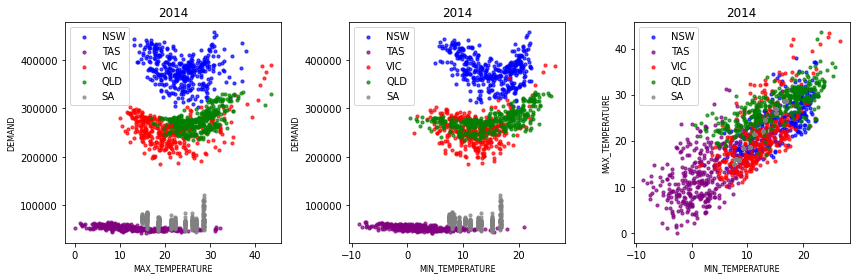

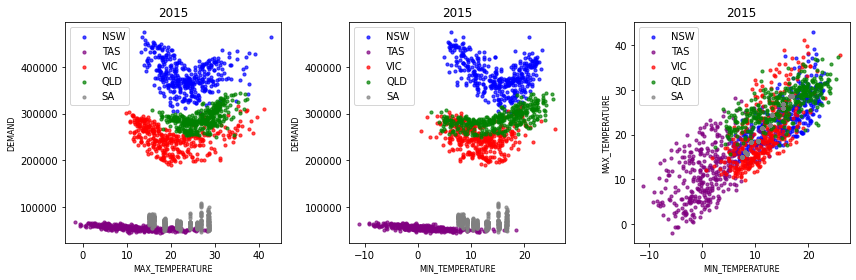

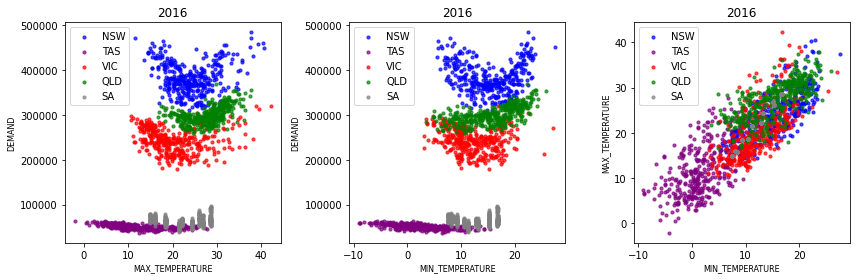

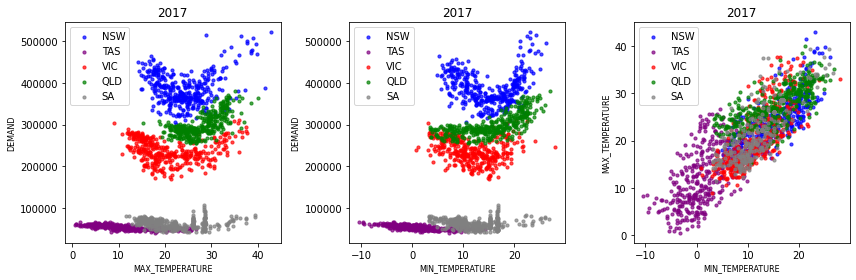

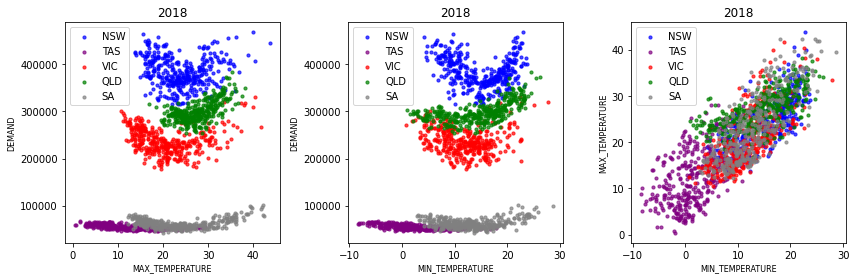

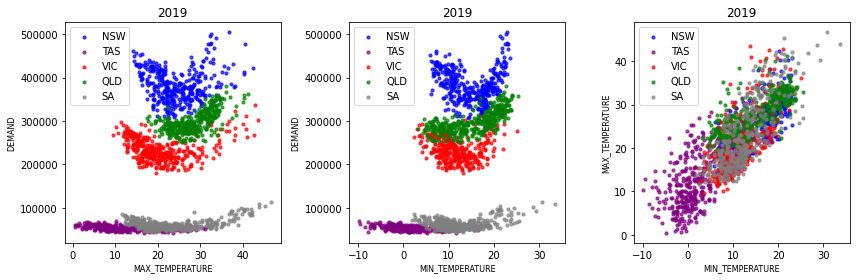

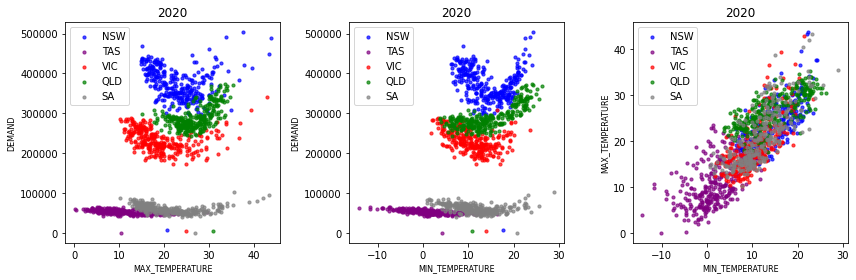

In [3]:
#Scatter Plots for each state ccolor coded
import matplotlib.pyplot as plt

# Overall size & Alignment

# Add year to the title


colors = {'NSW': 'b','TAS': 'purple', 'VIC': 'r','QLD' :'g', 'SA': 'grey'}

for y in (2014, 2015, 2016, 2017, 2018, 2019, 2020):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(12, 4), tight_layout =True)
    for t in ('NSW','TAS','VIC','QLD','SA'):
        ax1.scatter(Master_df[(Master_df['STATE']==t) & (Master_df['YEAR']==y) ]['MAX_TEMP'], Master_df[(Master_df['STATE']==t) & (Master_df['YEAR']==y) ]['DEMAND'], 
                    c=colors[t], 
                    label=t,
                    s=10, 
                    alpha=0.7)
        ax1.legend()
        ax1.set_title(y)
        ax1.set_xlabel("MAX_TEMPERATURE", fontsize=8)
        ax1.set_ylabel("DEMAND", fontsize=8)
        ax2.scatter(Master_df[(Master_df['STATE']==t) & (Master_df['YEAR']==y) ]['MIN_TEMP'], Master_df[(Master_df['STATE']==t) & (Master_df['YEAR']==y) ]['DEMAND'], 
                    c=colors[t], 
                    label=t,
                    s=10, 
                    alpha=0.7)
        ax2.legend()
        ax2.set_title(y)
        ax2.set_xlabel("MIN_TEMPERATURE", fontsize=8)
        ax2.set_ylabel("DEMAND", fontsize=8)
        # PUT SECONDARY AXIS: pending
        ax3.scatter(Master_df[(Master_df['STATE']==t) & (Master_df['YEAR']==y) ]['MIN_TEMP'], Master_df[(Master_df['STATE']==t) & (Master_df['YEAR']==y) ]['MAX_TEMP'], 
                    c=colors[t], 
                    label=t,
                    s=10, 
                    alpha=0.7)
        ax3.legend()
        ax3.set_title(y)
        ax3.set_xlabel("MIN_TEMPERATURE", fontsize=8)
        ax3.set_ylabel("MAX_TEMPERATURE", fontsize=8)

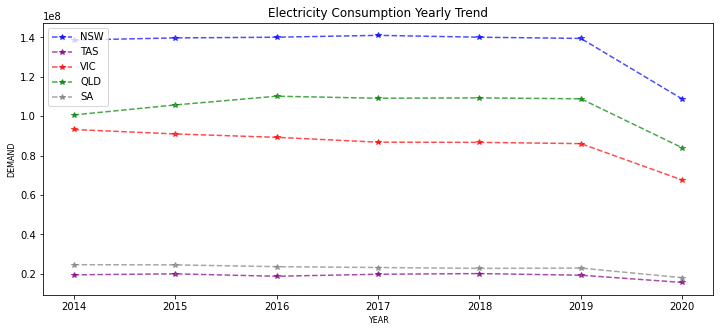

In [4]:
#Time Series Plot Year vs Demand, Year vs Average Max Temp, Year vs Average Min Temp( Line -chart)
df = pd.DataFrame({'DEMAND': Master_df.groupby(['STATE', 'YEAR'])['DEMAND'].sum()}).reset_index()

fig, ax1 = plt.subplots(figsize = (12,5))
colors = {'NSW': 'b','TAS': 'purple', 'VIC': 'r','QLD' :'g', 'SA': 'grey'}
for t in ('NSW','TAS','VIC','QLD','SA'):
    ax1.plot(df[(df['STATE']==t)]['YEAR'], df[(df['STATE']==t)]['DEMAND'], 
                    c=colors[t], 
                    label=t, 
                    alpha=0.7, marker = '*', linestyle = '--')
    ax1.legend(loc = 'upper left')
    ax1.set_title('Electricity Consumption Yearly Trend')
    ax1.set_xlabel("YEAR", fontsize=8)
    ax1.set_ylabel("DEMAND", fontsize=8)


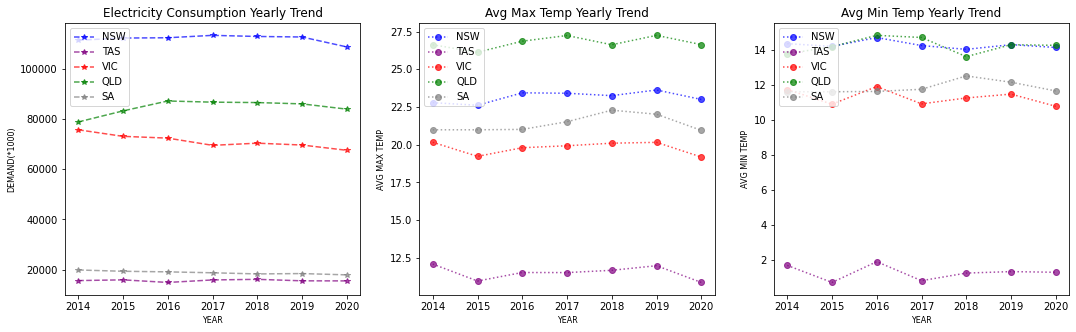

In [5]:
# FOR 2020, WE HAVE DATA TILL 16TH OCTOBER, 2020. IT will not reflect any changes after 16th October, let us plot all years data till 16th October 2020
df1 = Master_df.loc[~((Master_df['MONTH'] == 10) & (Master_df['DAY'] > 17)) & (~Master_df['MONTH'].isin([11,12]))]
df =pd.DataFrame({'DEMAND': (df1.groupby(['STATE', 'YEAR'])['DEMAND'].sum())/1000}).reset_index()
df2 = pd.DataFrame({'MAX_TEMP': (df1.groupby(['STATE', 'YEAR'])['MAX_TEMP'].mean())}).reset_index()
df3 = pd.DataFrame({'MIN_TEMP': (df1.groupby(['STATE', 'YEAR'])['MIN_TEMP'].mean())}).reset_index()

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (18,5))
colors = {'NSW': 'b','TAS': 'purple', 'VIC': 'r','QLD' :'g', 'SA': 'grey'}
for t in ('NSW','TAS','VIC','QLD','SA'):
    ax1.plot(df[(df['STATE']==t)]['YEAR'], df[(df['STATE']==t)]['DEMAND'], 
                    c=colors[t], 
                    label=t, 
                    alpha=0.7, marker = '*', linestyle = '--')
    ax1.legend(loc = 'upper left')
    ax1.set_title('Electricity Consumption Yearly Trend')
    ax1.set_xlabel("YEAR", fontsize=8)
    ax1.set_ylabel("DEMAND(*1000)", fontsize=8)
    ax2.plot(df2[(df2['STATE']==t)]['YEAR'], df2[(df2['STATE']==t)]['MAX_TEMP'], 
                    c=colors[t], 
                    label=t, 
                    alpha=0.7, marker = 'o', linestyle = ':')
    ax2.legend(loc = 'upper left')
    ax2.set_title('Avg Max Temp Yearly Trend')
    ax2.set_xlabel("YEAR", fontsize=8)
    ax2.set_ylabel("AVG MAX TEMP", fontsize=8)
    ax3.plot(df3[(df3['STATE']==t)]['YEAR'], df3[(df3['STATE']==t)]['MIN_TEMP'],
                    c=colors[t], 
                    label=t, 
                    alpha=0.7, marker = 'o', linestyle = ':')
    ax3.legend(loc = 'upper left')
    ax3.set_title('Avg Min Temp Yearly Trend')
    ax3.set_xlabel("YEAR", fontsize=8)
    ax3.set_ylabel("AVG MIN TEMP", fontsize=8)



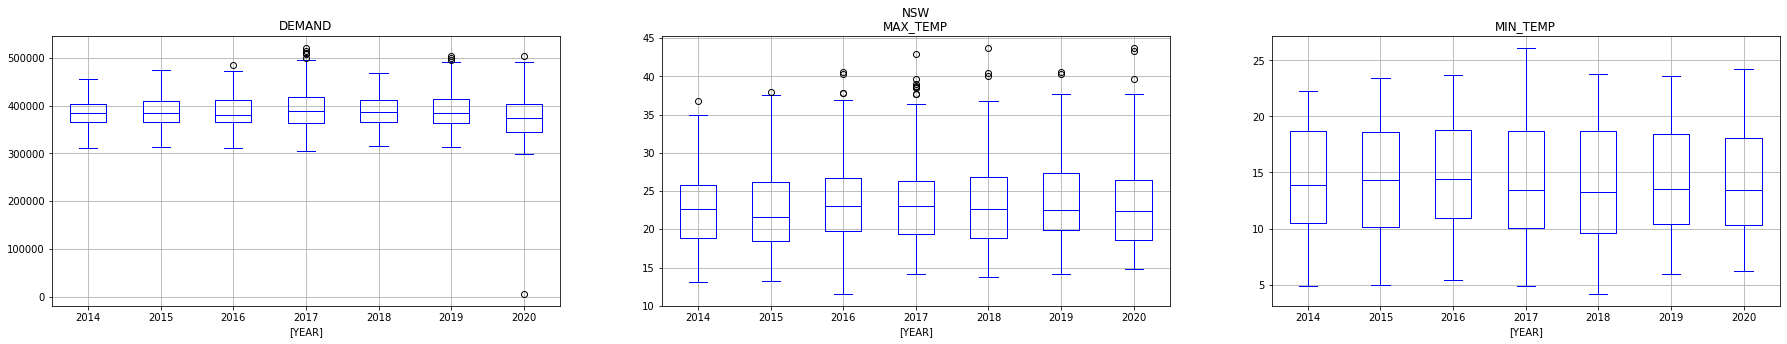

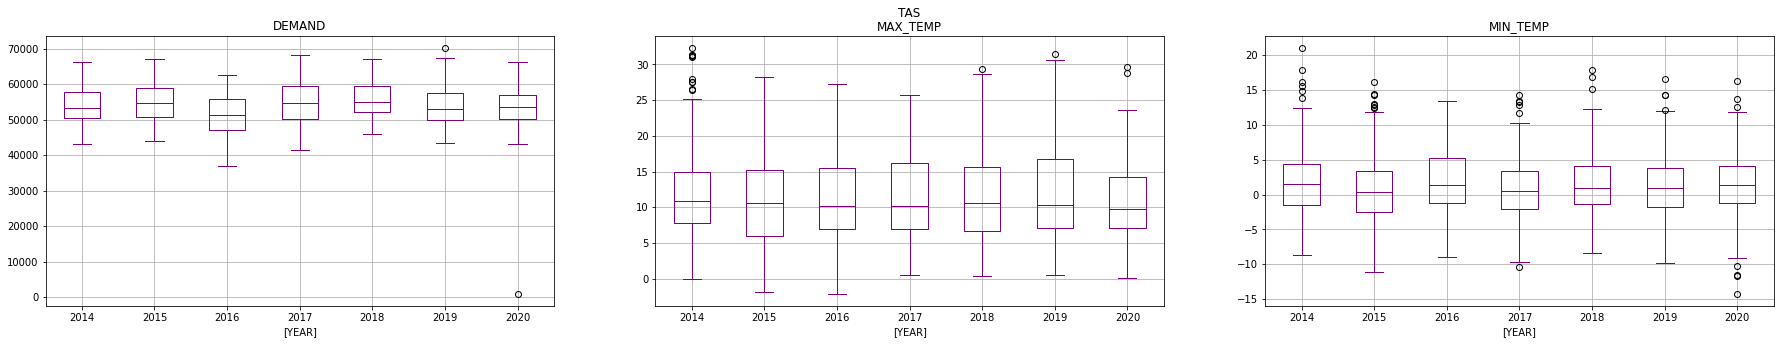

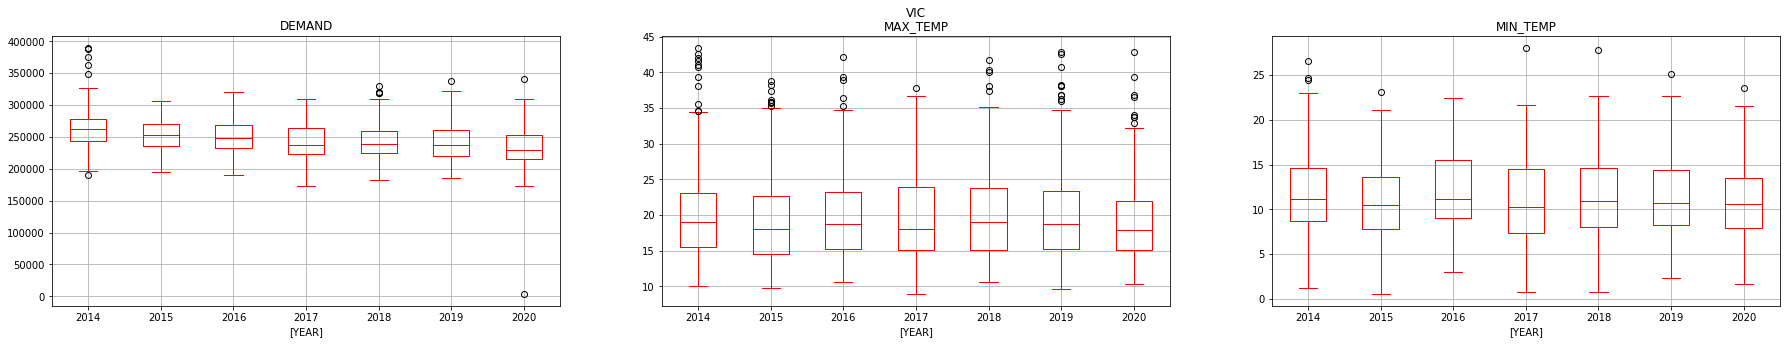

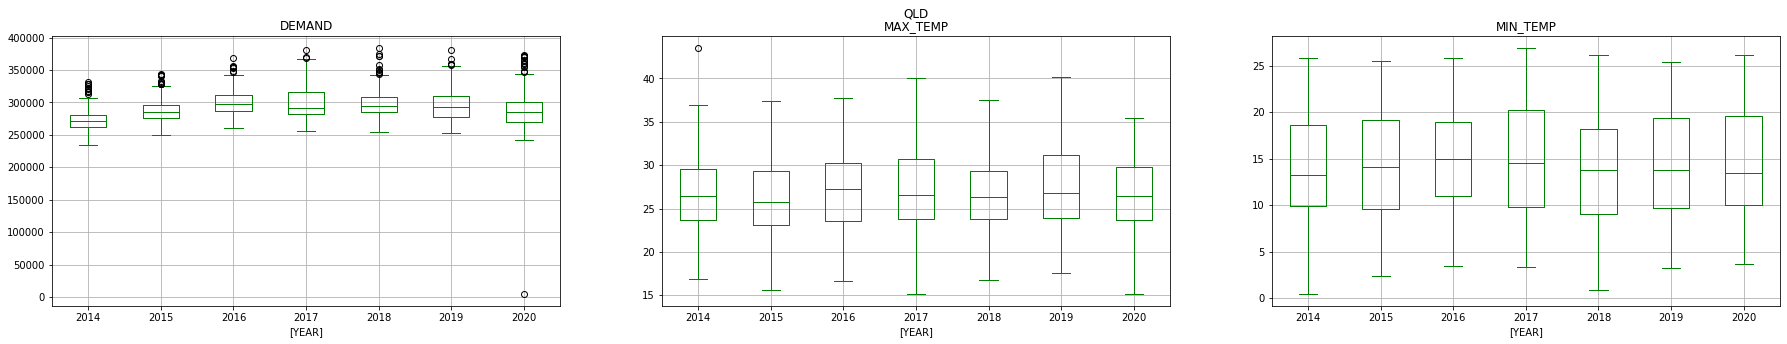

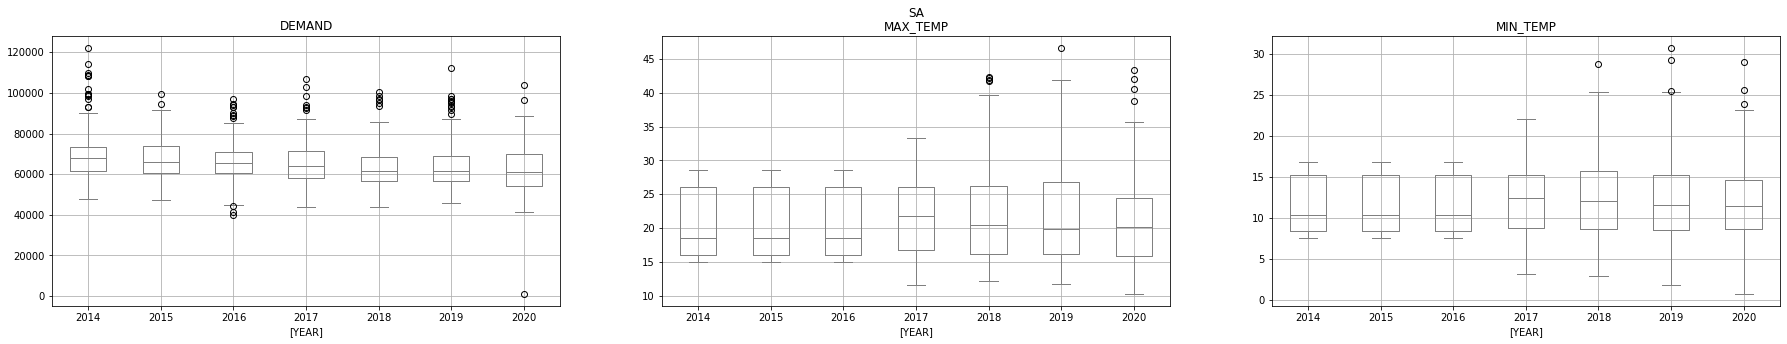

In [6]:
colors = {'NSW': 'b','TAS': 'purple', 'VIC': 'r','QLD' :'g', 'SA': 'grey'}
for t in ('NSW','TAS','VIC','QLD','SA'):
    fig, ax = plt.subplots(1, 3, figsize=(30, 5))
   
    df1.loc[df1['STATE']== t].boxplot(by =['YEAR'], column = ['DEMAND'], ax= ax[0], color=dict(boxes=colors[t], whiskers=colors[t], medians=colors[t], caps=colors[t]))
    df1.loc[df1['STATE']== t].boxplot(by =['YEAR'], column = ['MAX_TEMP'], ax= ax[1],  color=dict(boxes=colors[t], whiskers=colors[t], medians=colors[t], caps=colors[t]))
    df1.loc[df1['STATE']== t].boxplot(by =['YEAR'], column = ['MIN_TEMP'], ax= ax[2],  color=dict(boxes=colors[t], whiskers=colors[t], medians=colors[t], caps=colors[t]))
    plt.suptitle(t)

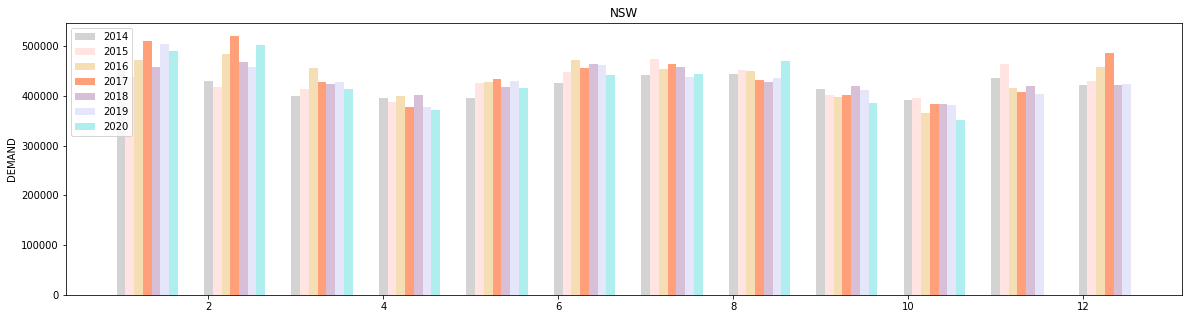

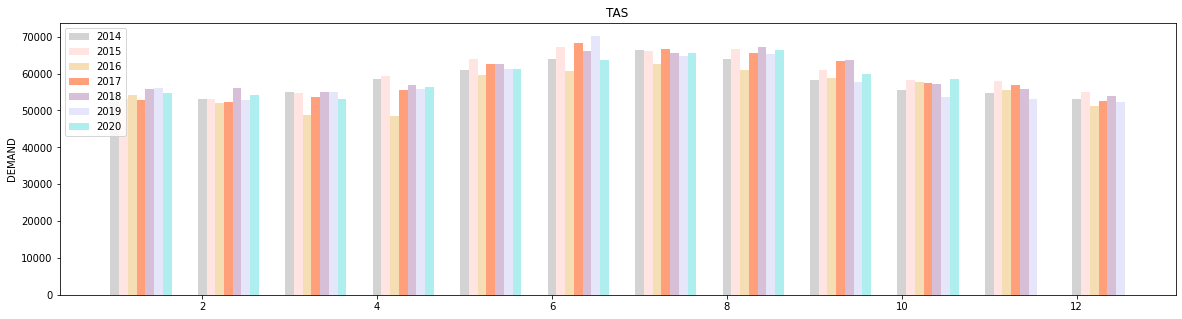

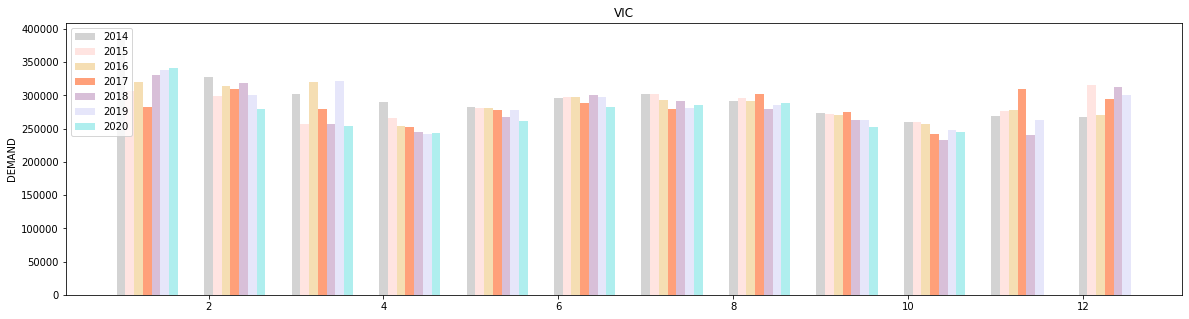

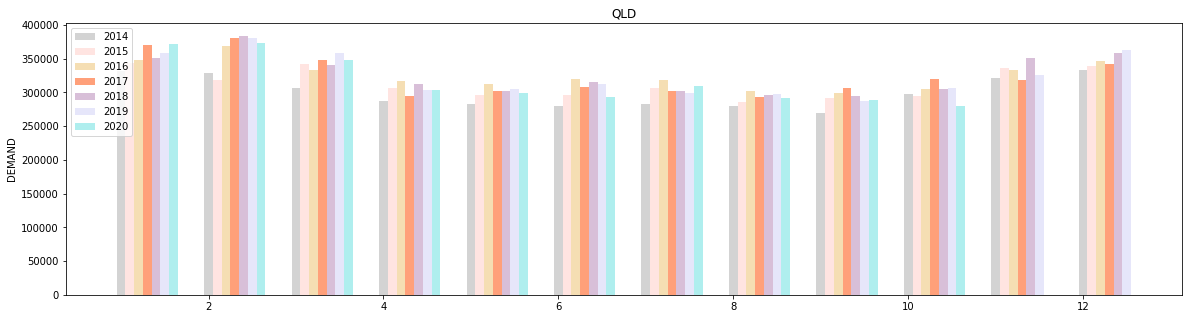

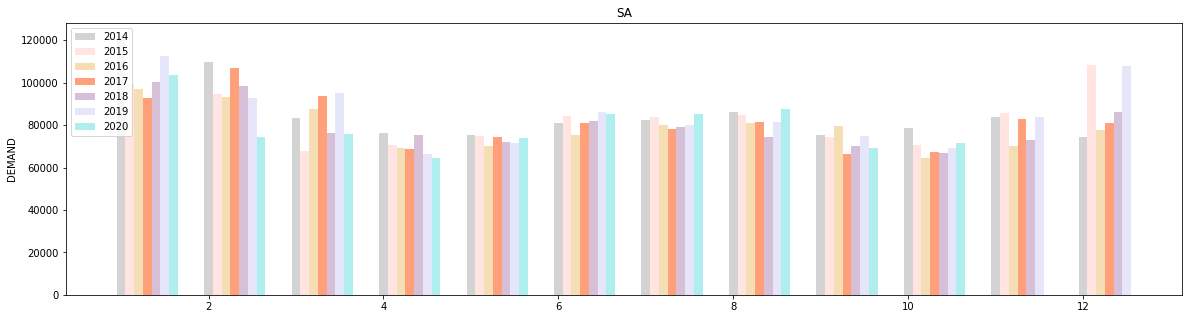

In [7]:
#Yearly distribution of electricity(Monthly variation)
#Avg_Min_Tempearture, Avg_Max_Temperature for different states and for different years(Bar Graphs)

colors = {2014: 'lightgrey', 2015: 'mistyrose', 2016: 'wheat', 2017 :'lightsalmon', 2018: 'thistle', 2019: 'lavender', 2020: 'paleturquoise'}
y = [2014, 2015, 2016, 2017, 2018, 2019, 2020]

width = 0.1
for t in ('NSW','TAS','VIC','QLD','SA'):
    fig, ax = plt.subplots(figsize =(20,5))
    for i in range(0,len(y)):
        ax.bar(Master_df[(Master_df['YEAR']==y[i]) & (Master_df['STATE']==t)]['MONTH']+ width*i , 
               Master_df[(Master_df['YEAR']==y[i]) & (Master_df['STATE']==t)]['DEMAND'],
               color = colors[y[i]], width = 0.1, label = y[i])

    ax.set_ylabel('DEMAND')
    ax.set_title(t)
    ax.legend(loc = 'upper left')

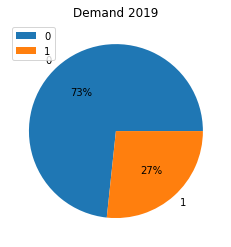

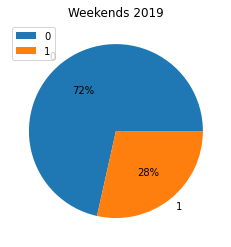

In [8]:
#Pie charts
df =pd.DataFrame({'DEMAND': (Master_df.groupby(['YEAR', 'Weekened_Flag'])['DEMAND'].sum())/1000}).reset_index()
df1 =pd.DataFrame({'COUNT': (Master_df.groupby(['YEAR', 'Weekened_Flag'])['Weekened_Flag'].count())}).reset_index()
y = [2018, 2019, 2020]
labels = [0, 1]
fig, ax = plt.subplots()
ax.pie(df['DEMAND'][(df['YEAR']== 2019)], autopct='%.0f%%', labels = labels, radius = 1)
ax.set_title("Demand 2019")
ax.legend(loc = 'upper left')

fig, ax = plt.subplots()
ax.pie(df1['COUNT'][(df1['YEAR']== 2019)], autopct='%.0f%%', labels = labels, radius = 1)
ax.set_title("Weekends 2019")
ax.legend(loc = 'upper left')
# Master